# Numpy: acelerando operações sobre vetores

## Comparações: escrita e acesso

### Velocidade de escrita

O código a seguir gera 100 milhões de valores aleatórios entre 0 e 1 usando a biblioteca `random` do próprio Python. Os valores são guardados em uma lista.

In [1]:
SIZE = 100000000

In [2]:
from random import random

values = list()
for i in range(SIZE):
    values.append(random())

O mesmo é feito a seguir, usando o inicializador rand da biblioteca `numpy`

In [3]:
import numpy as np

values_np = np.random.rand(SIZE)

### Velocidade de acesso

As coisas pioram ainda mais quando estamos avaliando a velocidade de acesso a esses dados. Listas em Python não são otimizadas para armazenar os valores próximos um dos outros, logo, todo acesso feito é mais lento que o acesso feito a um _array_ do _NumPy_.

Por exemplo, calculando a soma de todos os valores gerados aleatoriamente.

In [4]:
sum = 0.
for v in values:
    sum += v
print(sum)

50004076.00899303


In [5]:
sum_np = np.sum(values_np)
print(sum_np)

49993856.076401174


E se quisermos tirar a mediana?

O código abaixo literalmente <span style="color:red">não roda no Notebook da Rub</span>. Tente, se quiser.

In [ ]:
# values.sort()
# median = values[SIZE//2]

Numpy

In [6]:
median = np.median(values_np)
print(median)

0.49990491624765027


(O que faz sentido, pois estamos usando  uma distribuição uniforme entre 0 e 1)

Em suma, por operações sobre vetores, matrizes e outros tensores (generalização para dimensões superiores) serem muito lentas em Python, o _NumPy_ forma a base de todas as outras bibliotecas que fazem operações sobre essas estruturas. Talvez no caso do Camp isso não faça muita diferença, devido ao volume reduzido de dados (no mundo real, 100 milhões de valores é um número pequeno), mas, para fazer uso das funcionalidades, é necessário conhecer essa base.

# Scipy: um canivete suíço

A biblioteca Scipy pode ser usada para
- Tratamento de sinais
- Transformada de Fourier
- Resolução de equações diferenciais
- Álgebra linear
- Interpolação polinomial
- Estatística

dentre outras funcionalidades.

No nosso caso, iremos usar a mesma para gerar diferentes distribuições.

In [7]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

## Distribuição uniforme

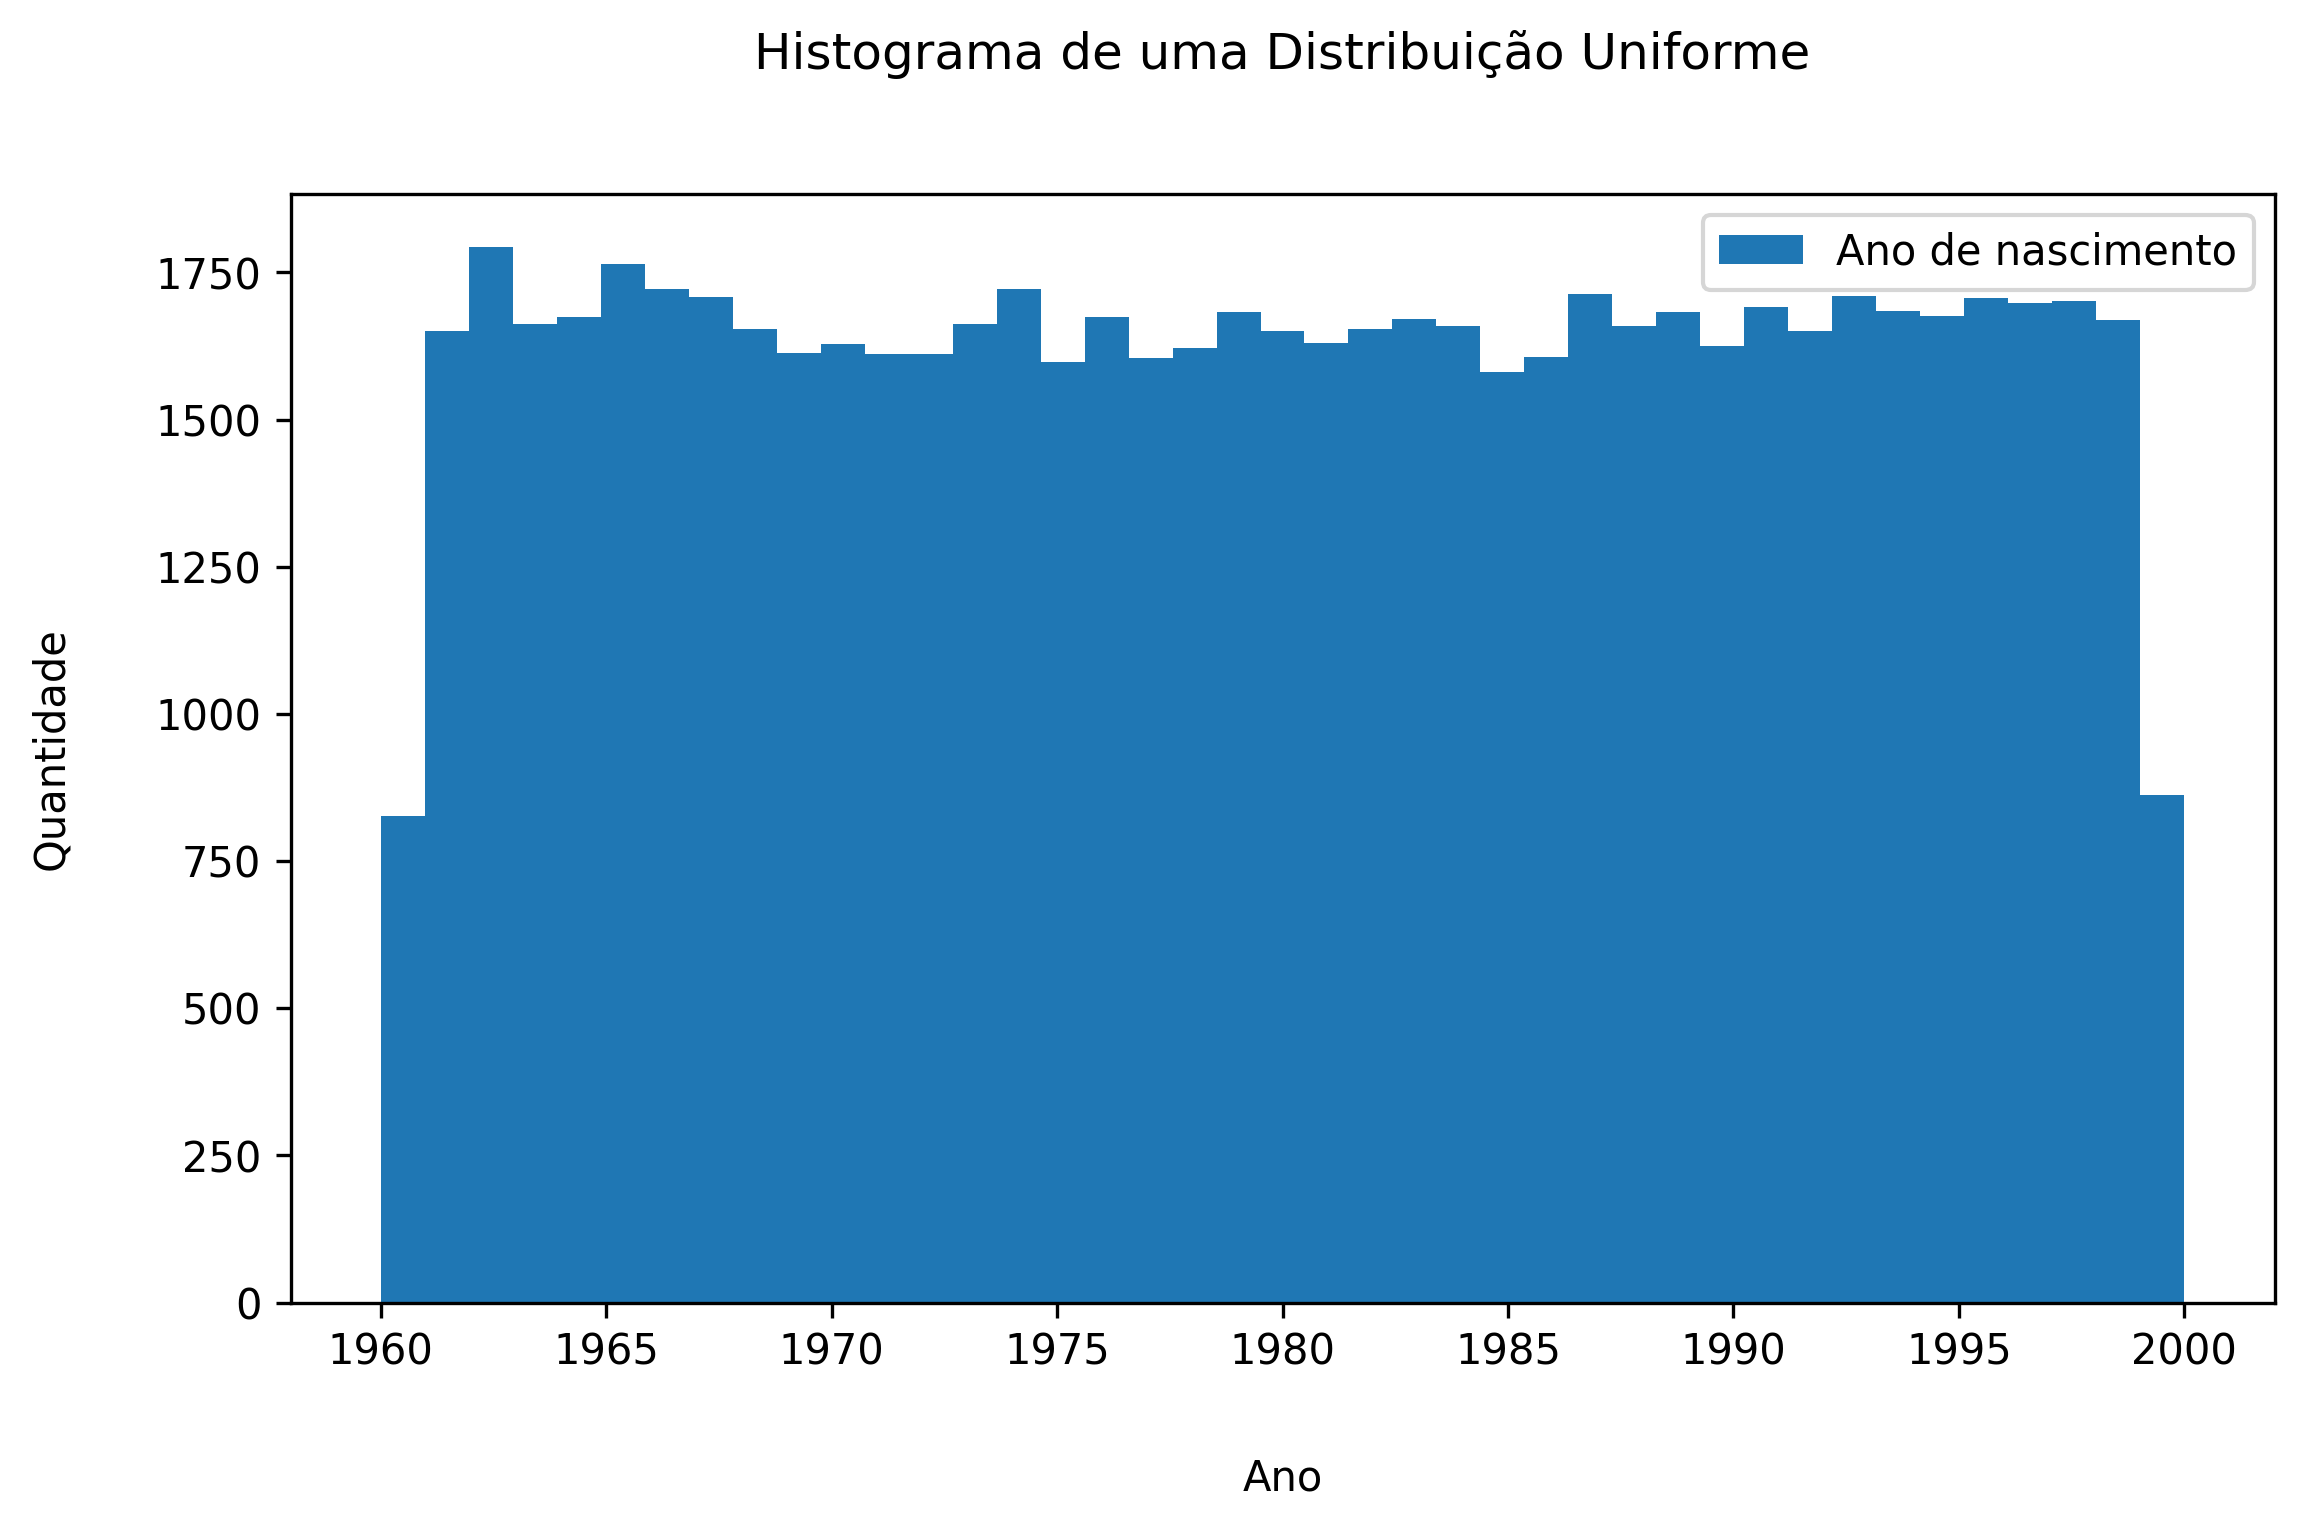

In [8]:
%matplotlib inline
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

a = 1960
b = 2000
years = np.arange(a, b+1)
data = uniform.rvs(size=66666, loc=a, scale=b-a)
data = np.round(data)
w, h = plt.figaspect(9/16)
fig = plt.figure(figsize=(w,h))
ax = fig.add_subplot(111)
ax.hist(data, bins=len(years), label='Ano de nascimento')
ax.set_title('Histograma de uma Distribuição Uniforme', pad=30)
ax.set_xlabel('Ano', labelpad=20)
ax.set_ylabel('Quantidade', labelpad=20)
ax.legend(loc='upper right')
plt.show()
fig.savefig('uniform_hist.png', dpi=1000, transparent=True, bbox_inches="tight")

# Distribuição Normal

$$
f(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}
$$

A fórmula parece complicada, mas o formato da distribuição normal é bem intuitivo:

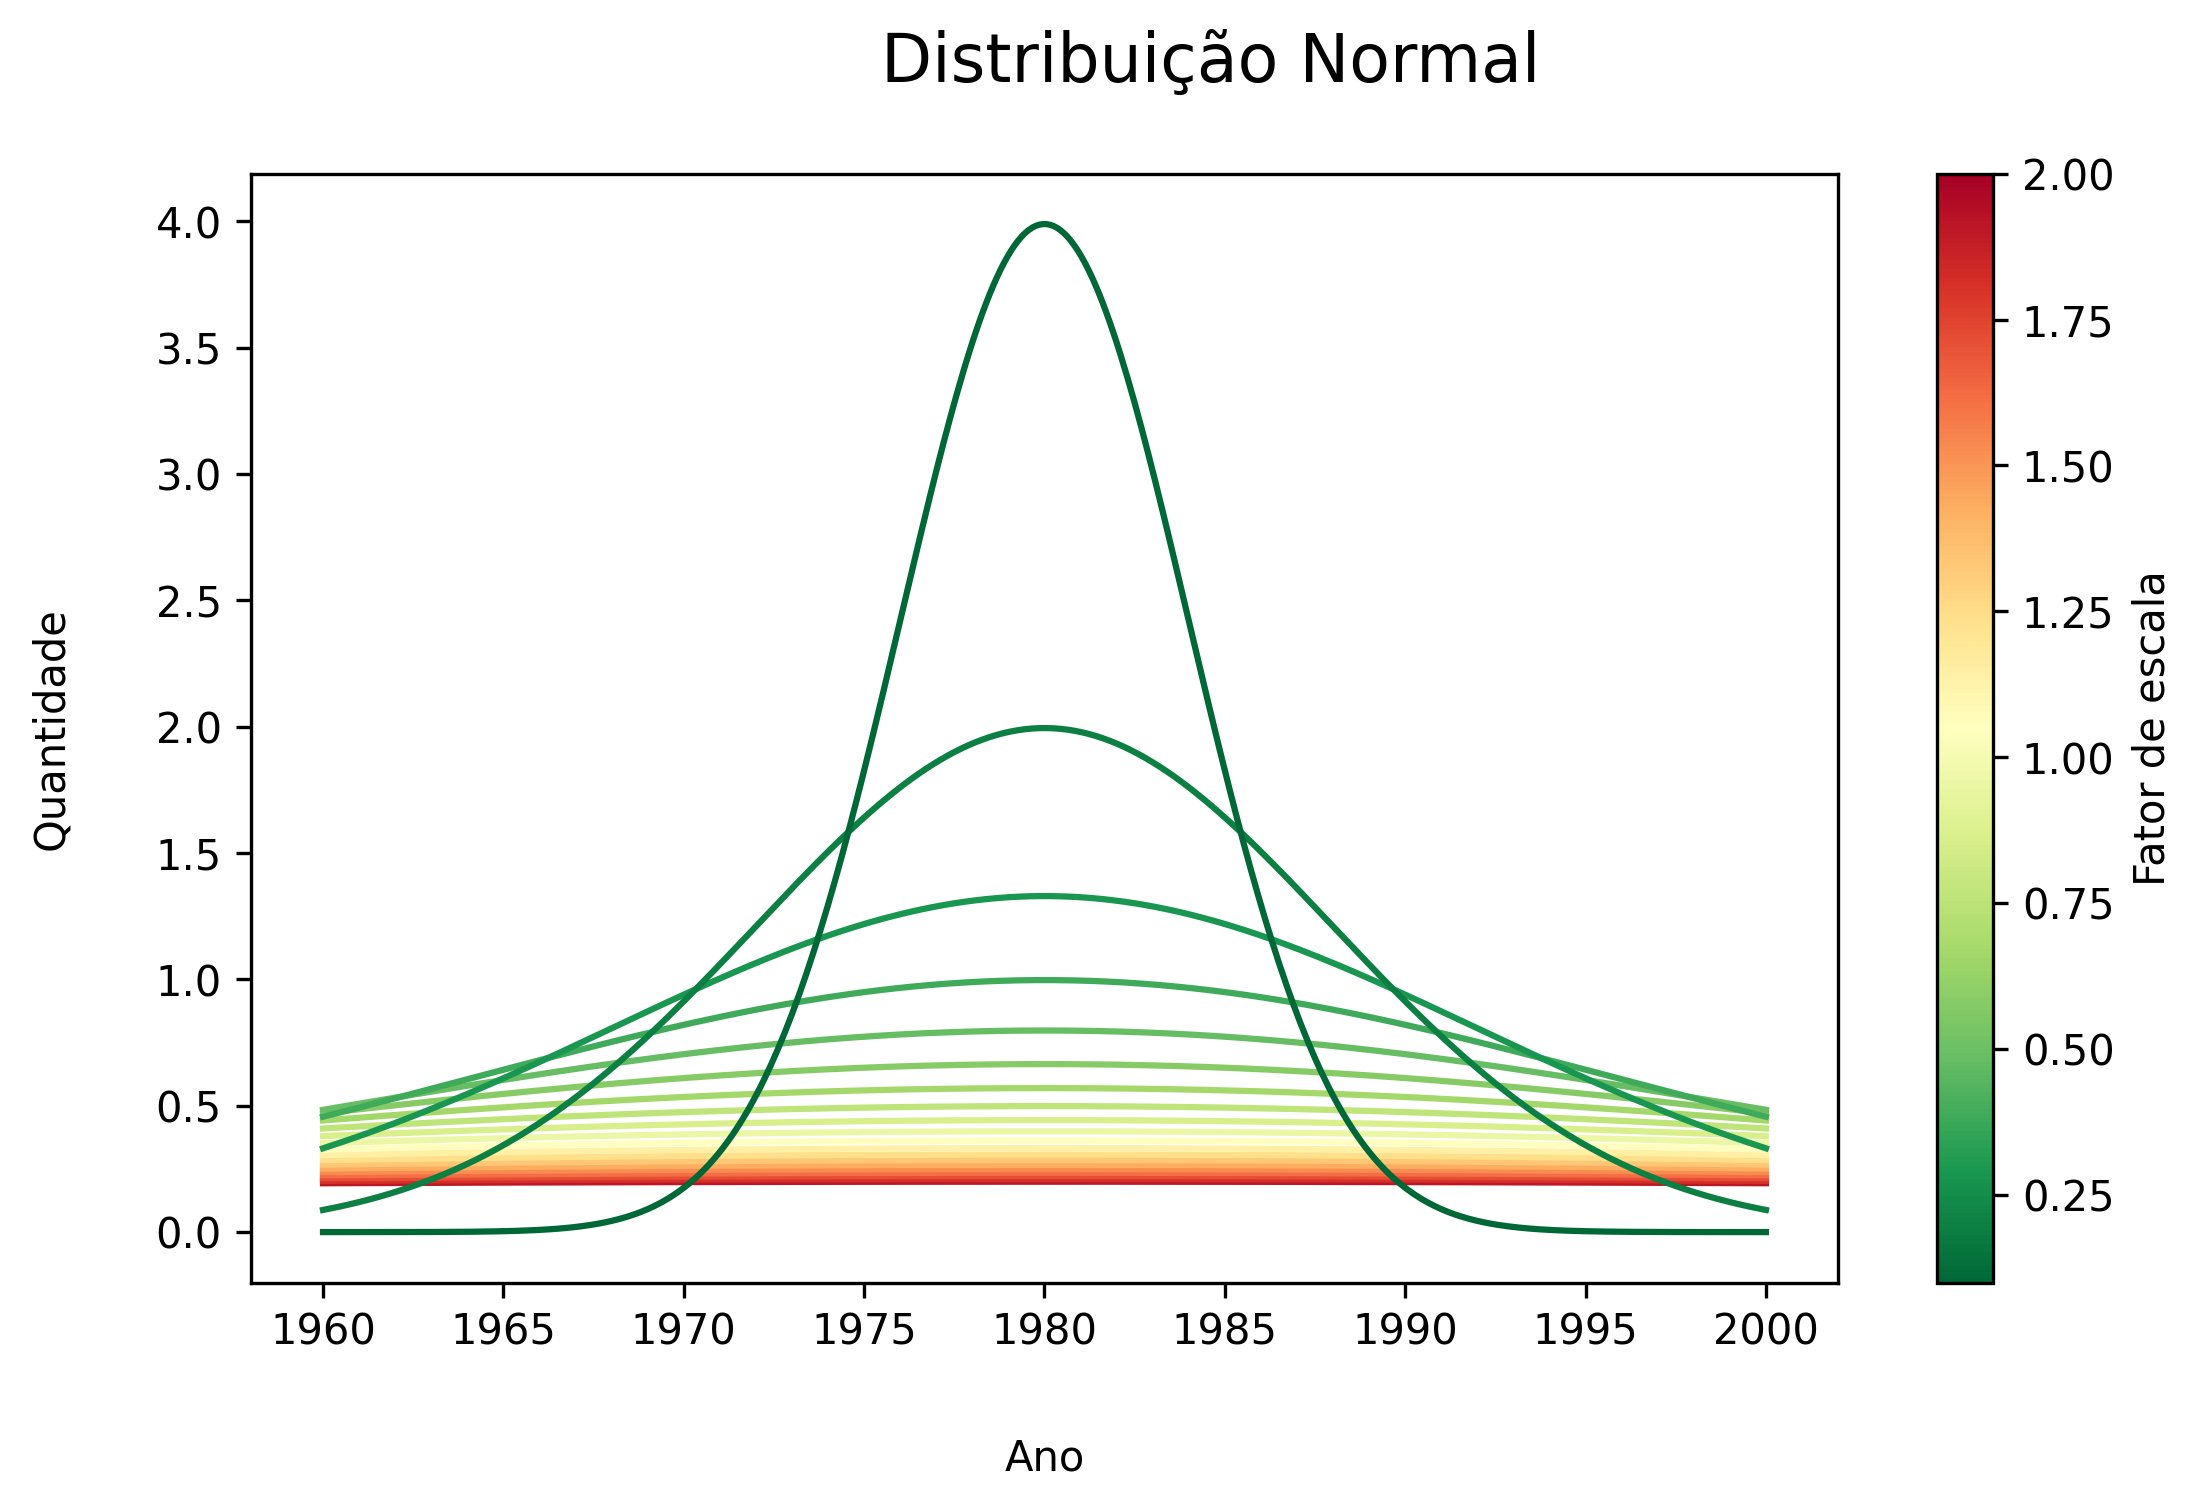

In [9]:
from scipy.stats import norm
from matplotlib.cm import ScalarMappable

x = np.linspace(0, 1, len(years) * 10)
years_smooth = np.linspace(1960, 2000, len(years) * 10)

scales = np.arange(0.1, 2.1, 0.1)

w, h = plt.figaspect(9/16)
fig = plt.figure(figsize=(w,h))
fig.suptitle('Distribuição Normal', fontsize=16)
color_map = plt.get_cmap('RdYlGn_r')

ax = fig.add_subplot(111)
ax.set_xlabel('Ano', labelpad=20)
ax.set_ylabel('Quantidade', labelpad=20)

for k, scale in reversed(list(enumerate(scales))):
    color = color_map(k / len(scales))
    weights = norm.pdf(x, loc=0.5, scale=scale)
    ax.plot(years_smooth, weights, color=color)

norm = plt.Normalize(scales.min(), scales.max())
scalar_mappable = ScalarMappable(cmap=color_map, norm=norm)
scalar_mappable.set_array([])
color_bar = plt.colorbar(scalar_mappable, ax=ax)
color_bar.set_label("Fator de escala")

plt.show()
fig.savefig('normal.png', dpi=1000, transparent=True, bbox_inches="tight")

Quanto maior a escala, mais "alargado" o gráfico se torna, diminuindo o tamanho do pico, e tornando as probabilidades mais iguais. Quando usamos escala = 1.0, obtemos a distribuição normal padrão. Apesar de já apresentar uma tendência quando comparada com a distribuição uniforme, a distribuição normal ainda é uma distribuição simétrica, com a média e a mediana iguais. Isso pode deixar na cara que os dados foram gerados usando algum método estatístico.

## Distribuição Alfa

$$
f(x,\alpha)=\frac{1}{x^2\phi(\alpha)\sqrt{2\pi}}*\exp\left(-\frac{1}{2}(\alpha-1/x)^2\right)
$$

Quê?

Calma. O que você precisa saber: essa distribuição tem um "pico" no seu início. O tamanho desse pico comparado com o restante da distribuição é determinado pelo parâmetro alfa $(\alpha)$. Vamos experimentar alguns valores diferentes.

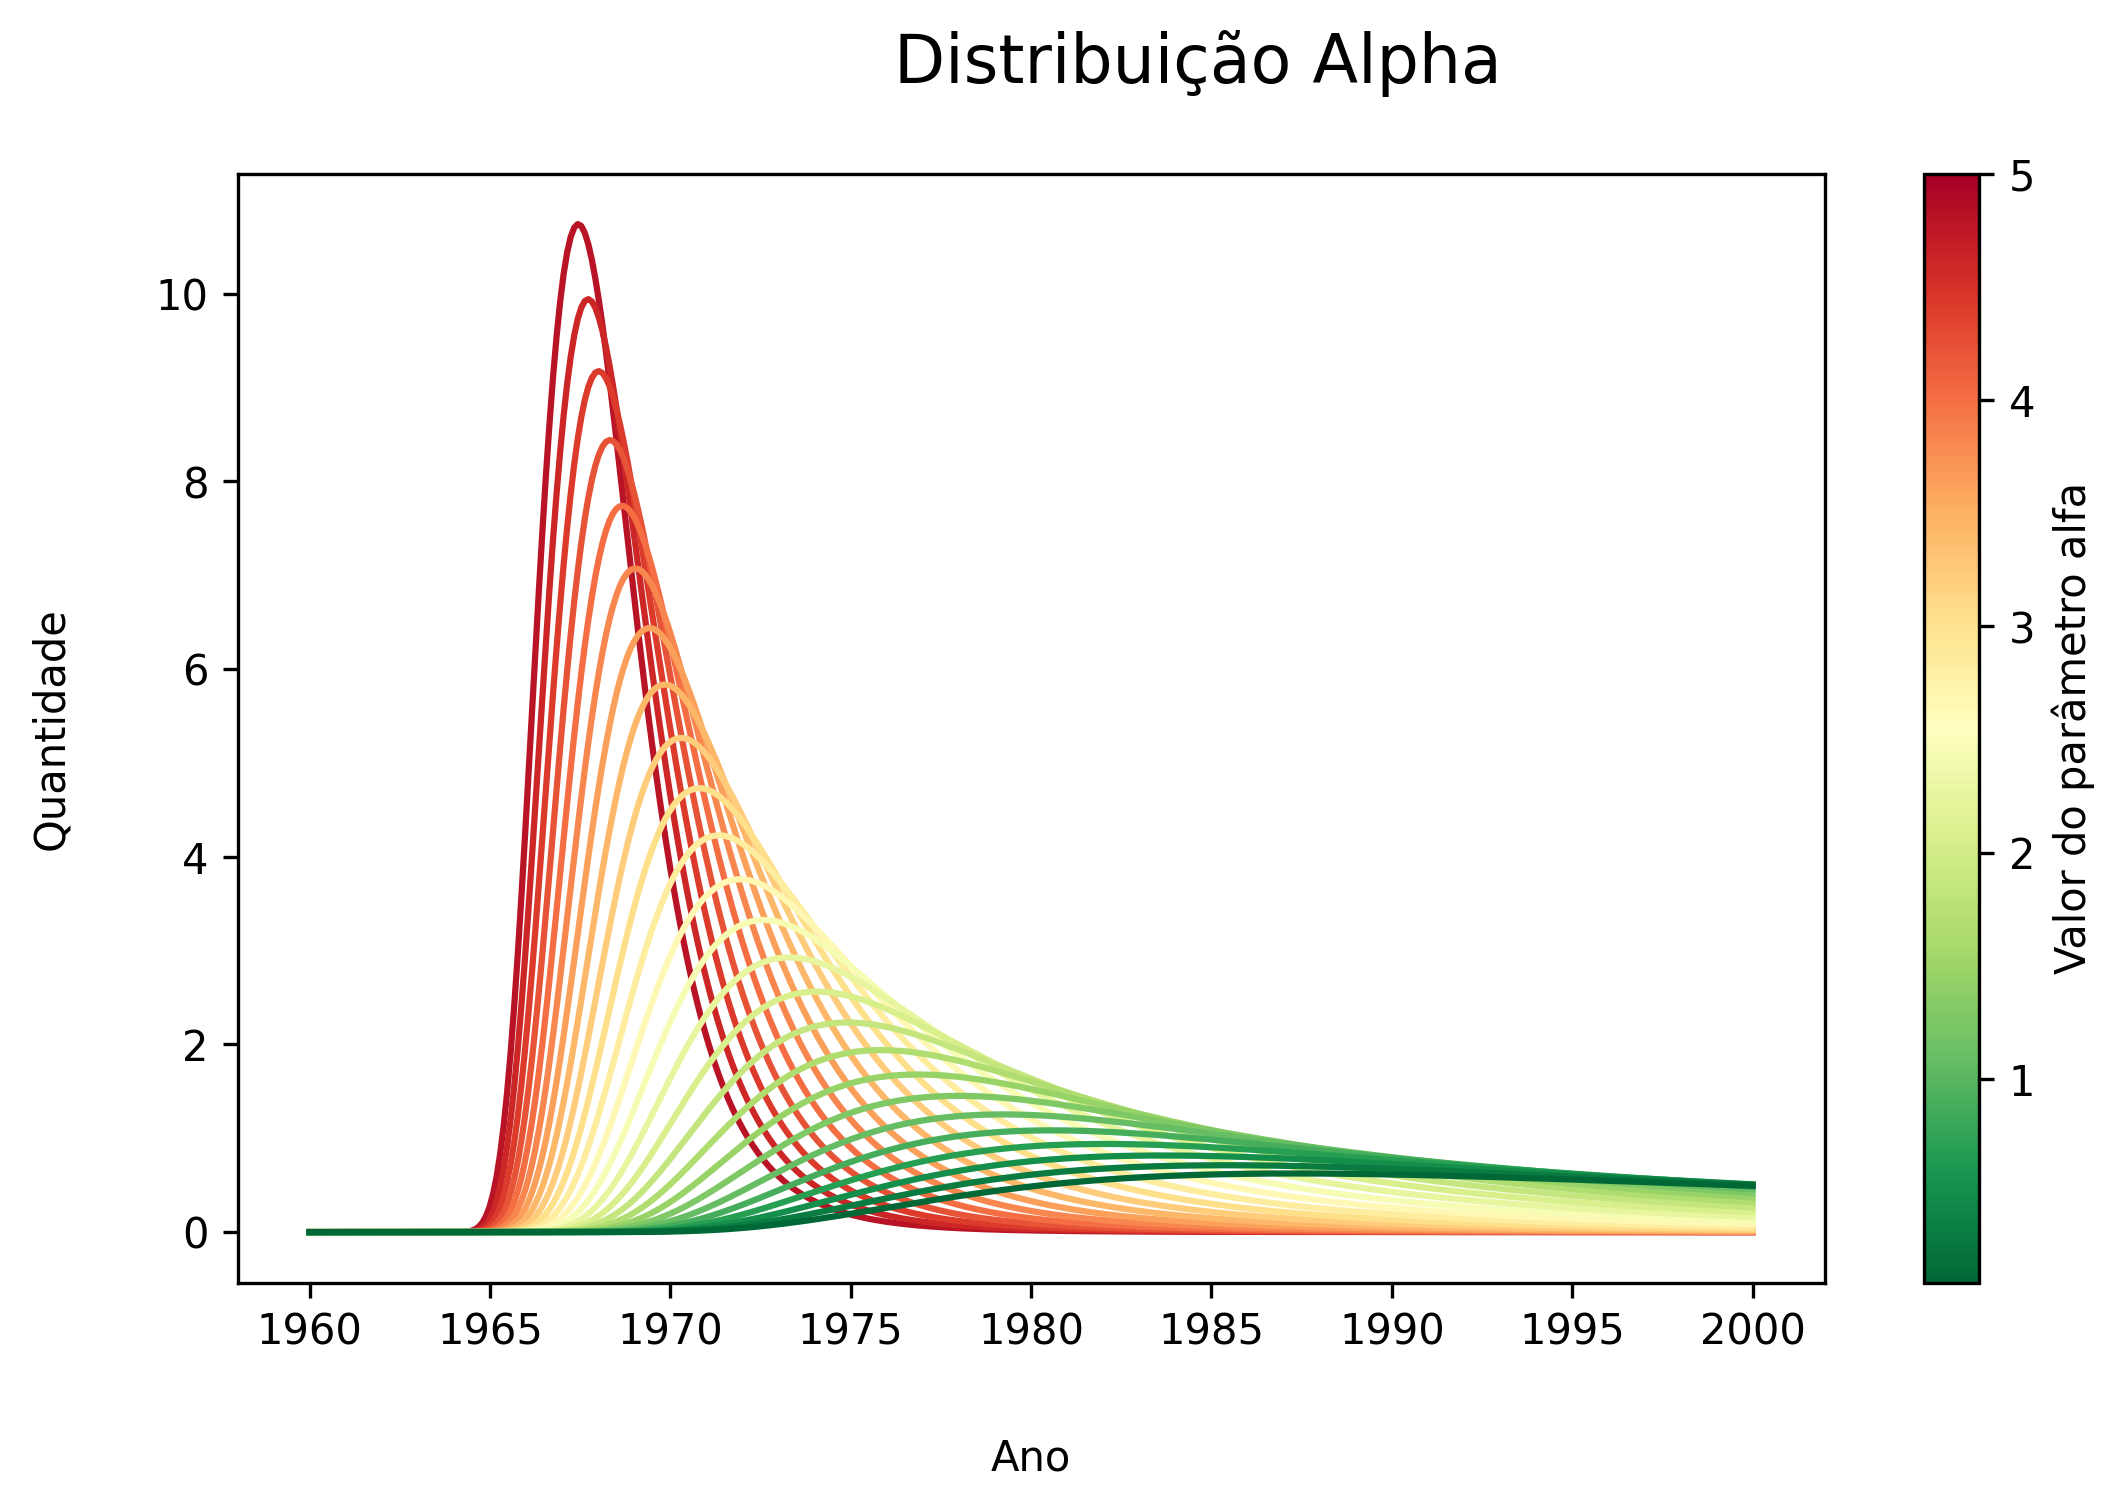

In [10]:
from scipy.stats import alpha
from matplotlib.cm import ScalarMappable

alphas = np.linspace(0.1, 5., 25)
x = np.linspace(0, 1, len(years) * 10)
years_smooth = np.linspace(1960, 2000, len(years) * 10)

w, h = plt.figaspect(9/16)
fig = plt.figure(figsize=(w,h))
fig.suptitle('Distribuição Alpha', fontsize=16)
color_map = plt.get_cmap('RdYlGn_r')

ax = fig.add_subplot(111)
ax.set_xlabel('Ano', labelpad=20)
ax.set_ylabel('Quantidade', labelpad=20)

for k, a in reversed(list(enumerate(alphas))):
    color = color_map(k / len(alphas))
    weights = alpha.pdf(x, a)
    ax.plot(years_smooth, weights, color=color)

norm = plt.Normalize(alphas.min(), alphas.max())
scalar_mappable = ScalarMappable(cmap=color_map, norm=norm)
scalar_mappable.set_array([])
color_bar = plt.colorbar(scalar_mappable, ax=ax)
color_bar.set_label("Valor do parâmetro alfa")

plt.savefig('alpha.png', dpi=1000, transparent=True, bbox_inches="tight")

## Distribuição Exponencial

$$
f(x)=\exp(-x)
$$

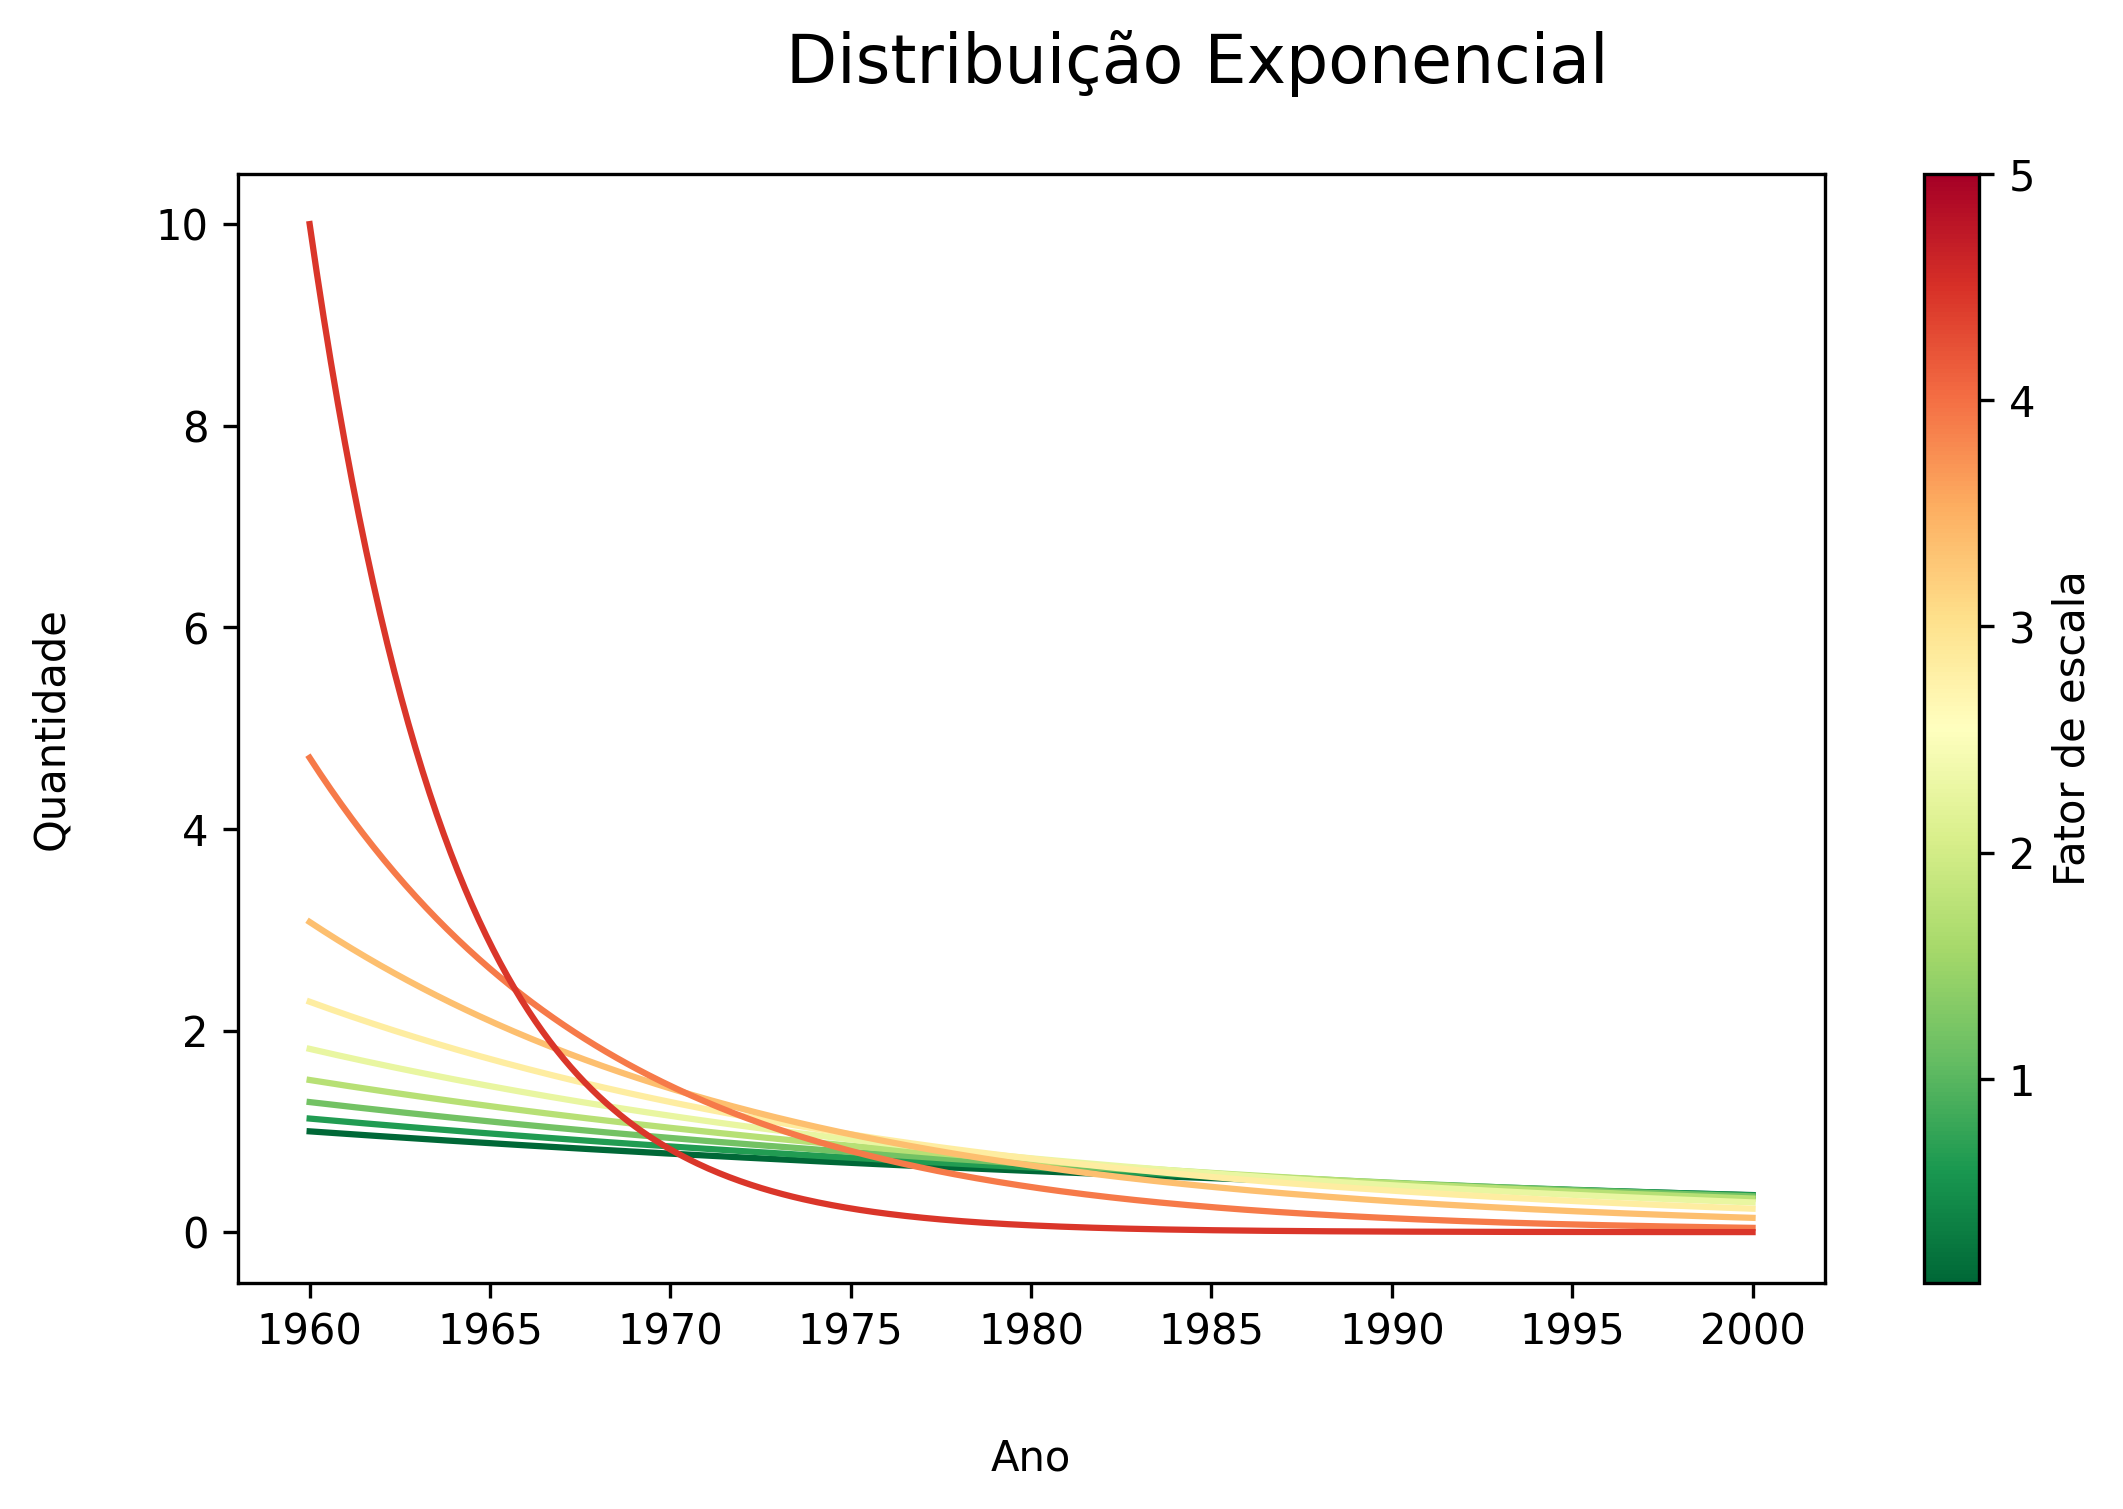

In [11]:
from scipy.stats import expon

scales = np.linspace(1, 0.1, 9)

fig = plt.figure(figsize=(w,h))
fig.suptitle('Distribuição Exponencial', fontsize=16)

ax = fig.add_subplot(111)
ax.set_xlabel('Ano', labelpad=20)
ax.set_ylabel('Quantidade', labelpad=20)

for k, scale in enumerate(scales):
    color = color_map(k / len(scales))
    weights = expon.pdf(x, loc=0, scale=scale)
    ax.plot(years_smooth, weights, color=color)

norm = plt.Normalize(alphas.min(), alphas.max())
scalar_mappable = ScalarMappable(cmap=color_map, norm=norm)
scalar_mappable.set_array([])
color_bar = plt.colorbar(scalar_mappable, ax=ax)
color_bar.set_label("Fator de escala")

plt.show()
fig.savefig('expon.png', dpi=1000, transparent=True, bbox_inches="tight")

Quando forçamos que a curva tenha sua escala alterada, também mudamos seu formato. Note que o valor do pico também é alterado.

## Adicionando ruído

Todos as distribuições de probabilidade que vimos até agora são geradas a partir de uma equação bem-definida. No mundo real, entretanto, é mais comum que os dados sejam gerados a partir de um processo estocástico, ou seja, um processo que envolve aleatoriedade. Para simular esse ruído, iremos usar um ruído gerado a partir de uma distribuição uniforme. Como exemplo, usaremos uma distribuição alfa qualquer.

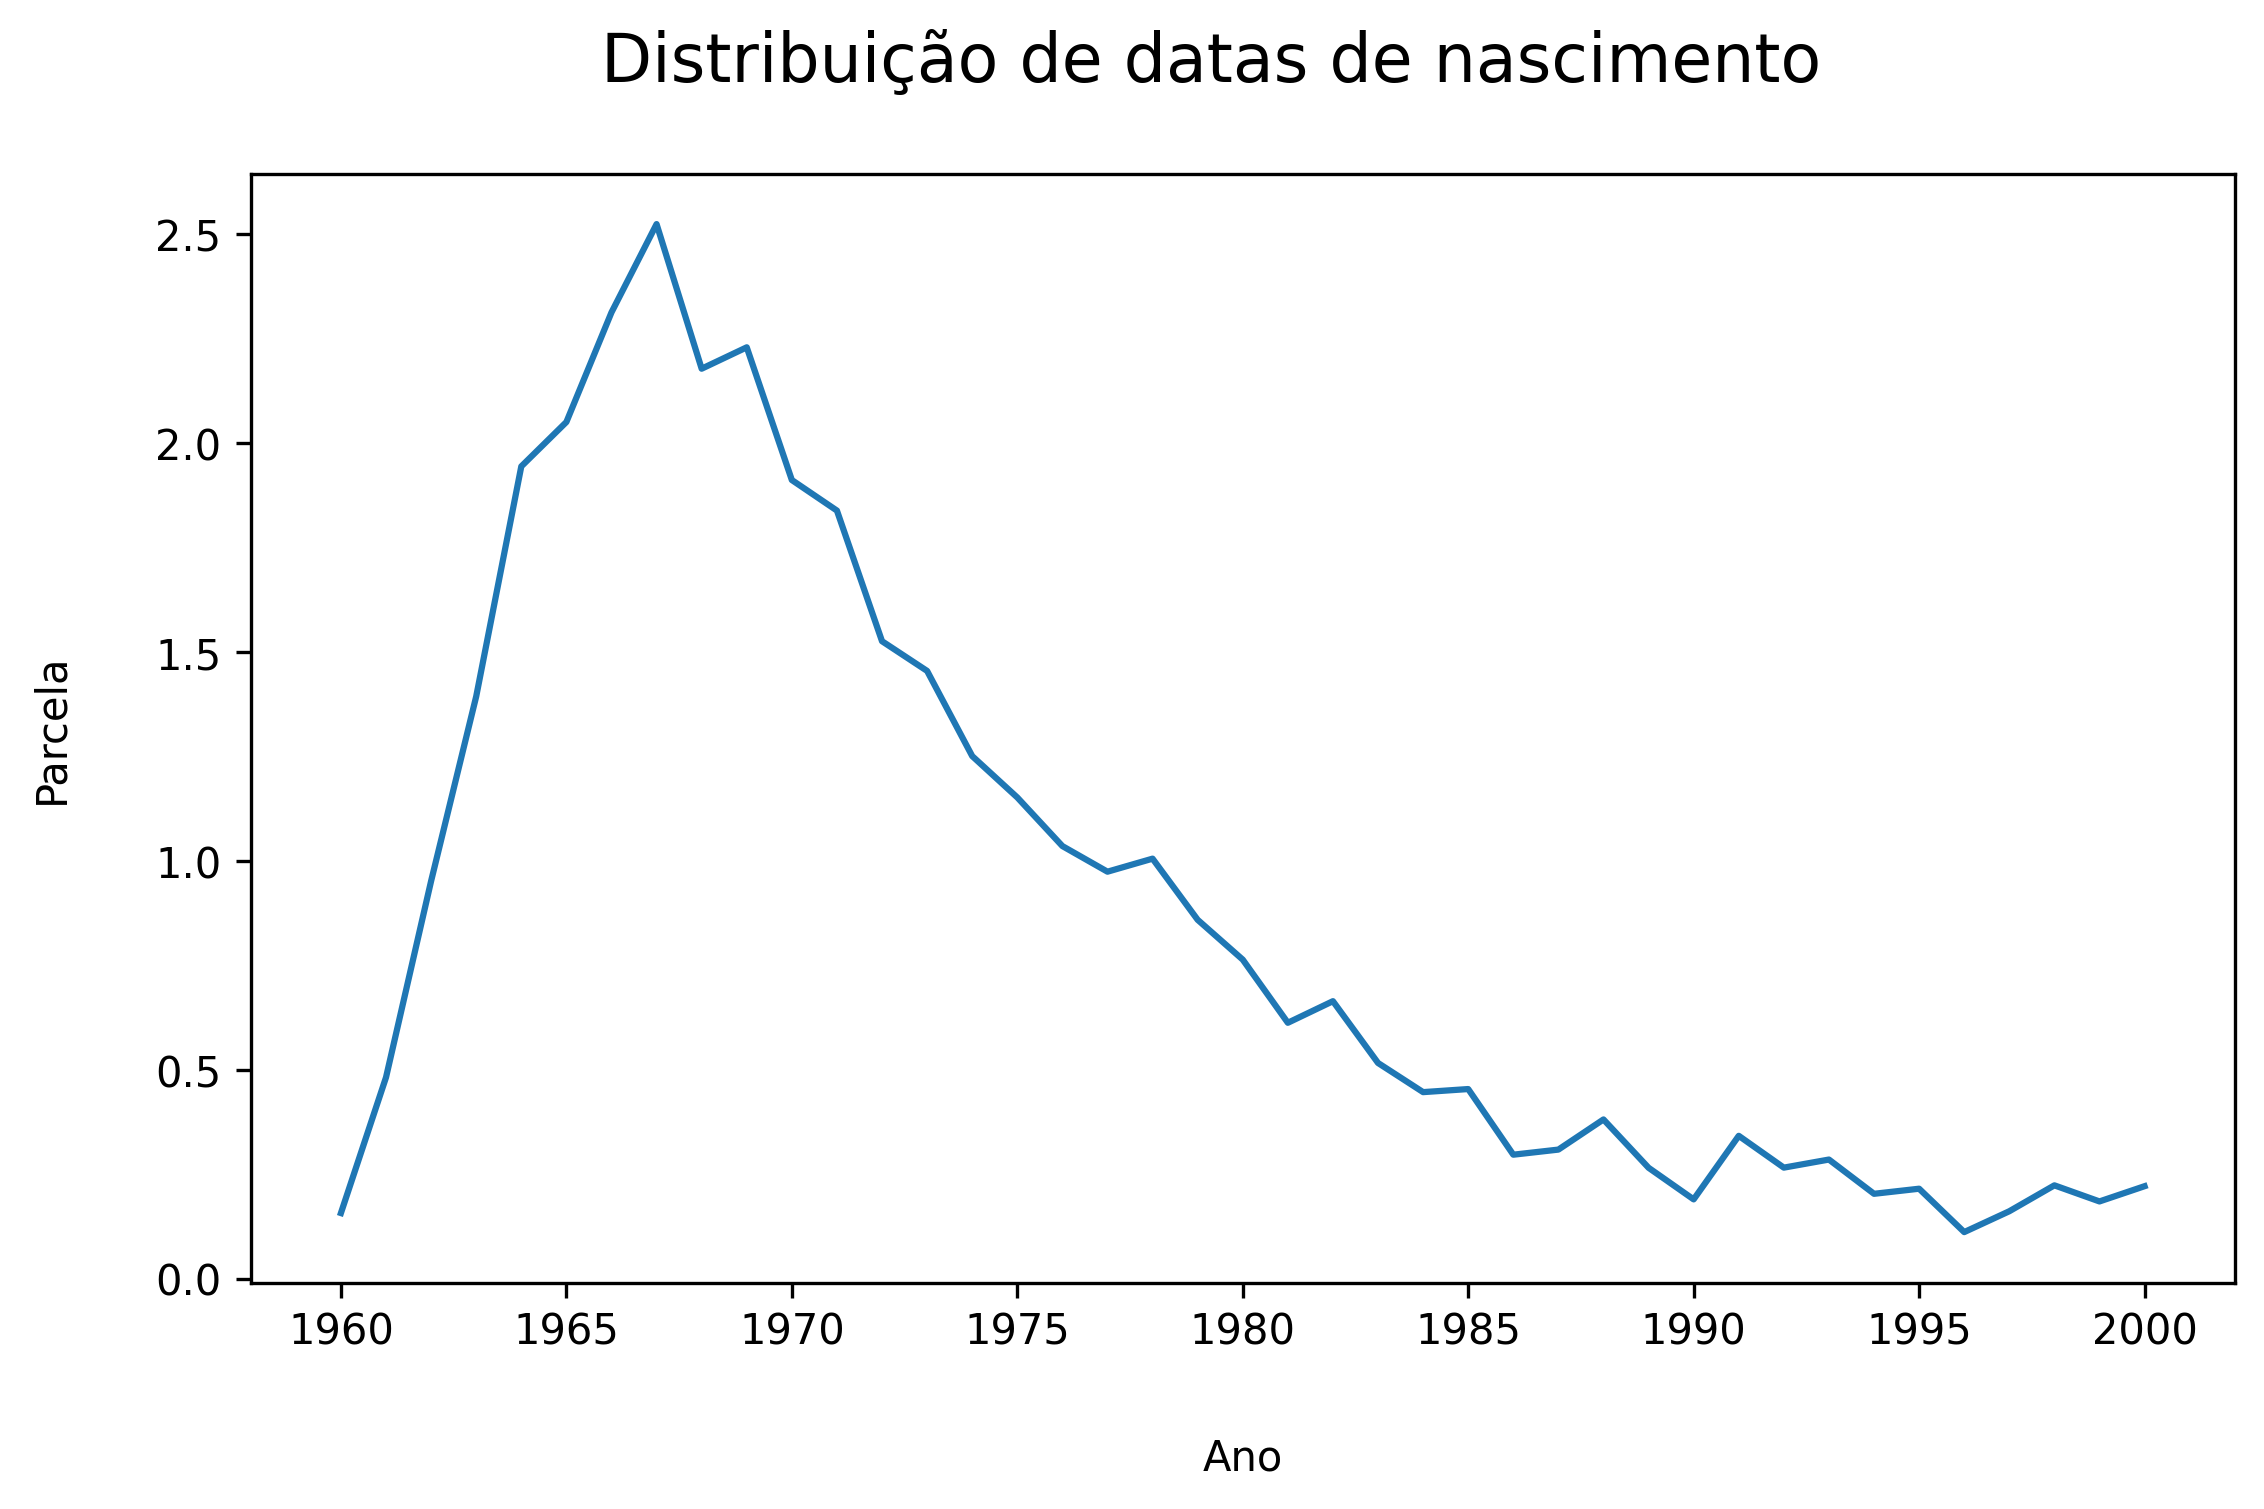

In [26]:
fig = plt.figure(figsize=(w,h))
fig.suptitle('Distribuição de datas de nascimento', fontsize=16)

ax = fig.add_subplot(111)
ax.set_xlabel('Ano', labelpad=20)
ax.set_ylabel('Parcela', labelpad=20)

x = np.linspace(0, 1, len(years))

weights = alpha.pdf(x, loc=-0.2, a=2)

# Gerando ruído aleatório
noise = np.random.normal(0, 0.075, len(weights))
weights += noise

ax.plot(years, weights, label='Alpha')
plt.show()
fig.savefig('noise.png', dpi=1000, transparent=True, bbox_inches="tight")

Esse gráfico parece um pouco mais "verdadeiro" por conta de suas imperfeições.

## Usando pesos para escolher um valor

Gráficos de distribuição de probabilidades são úteis, mas, como vamos ver mais adiante, precisamos escolher um valor aleatório usando essa distribuição para incluí-los em nossos registros armazenados em CSV. Para fazer isso, usaremos a função `choice` da biblioteca `numpy`. Para isso, vamos usar a última distribuição gerada.

In [27]:
# Gerando 66666 anos de nascimento aleatórios
random_choice = np.random.choice(years, size=66666, p=weights)

ValueError: probabilities do not sum to 1

O problema que obtivemos está relacionado aos valores da distribuição. Os valores de uma PDF precisam ser normalizados antes de serem usados para escolher um valor aleatório. Isso é feito para que a soma de todas as probabilidades seja igual a 1.0. Para resolver esse problema, basta dividir o vetor de pesos pela sua soma.

Valores gerados: [1977 1971 1971 ... 1962 1971 1970]


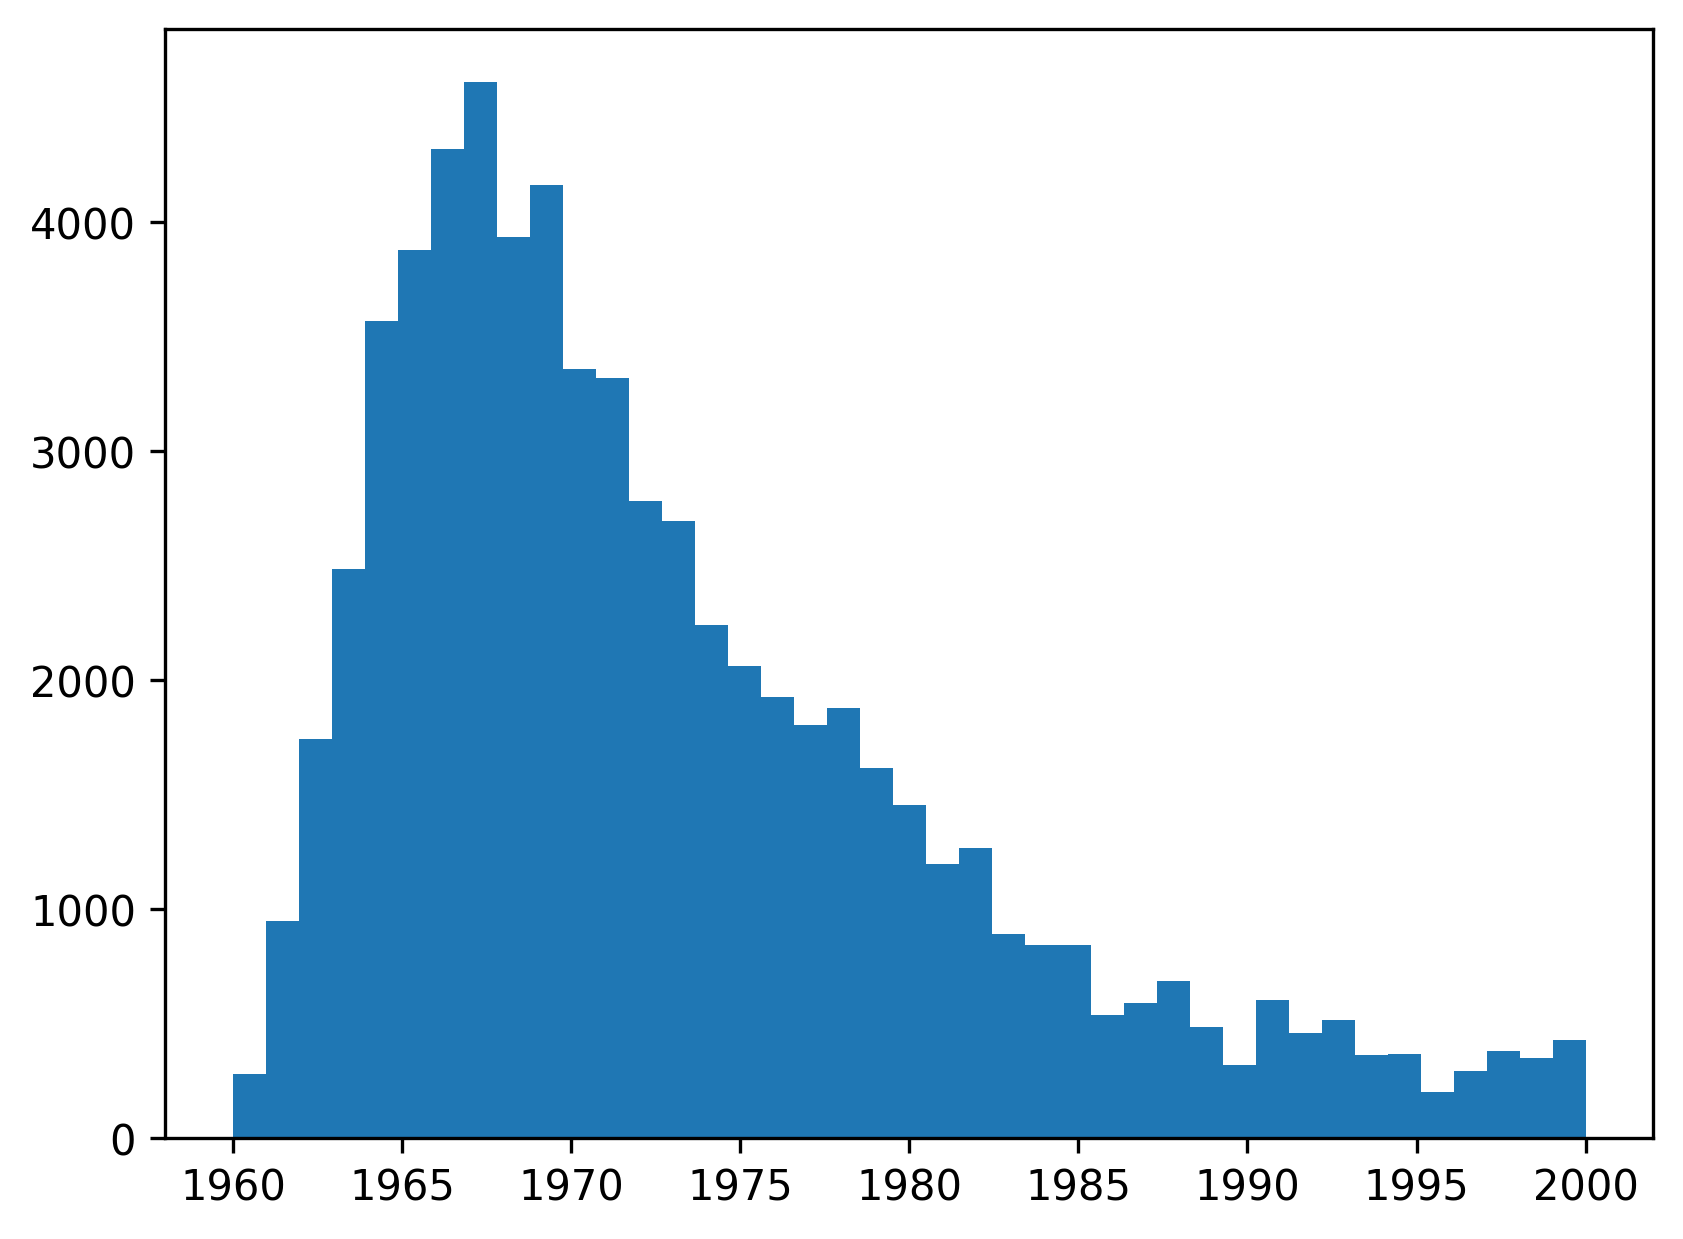

In [31]:
weights_normalized = weights / weights.sum()
random_choice = np.random.choice(years, size=66666, p=weights_normalized)
print("Valores gerados:", random_choice)
plt.hist(random_choice, bins=len(years))
plt.show()

Como podemos ver, escolhemos 10 anos aleatórios, e a grande maioria deles se encontram no período que data do fim da década de 60 e durante a década de 70, que é o período que a distribuição alfa tem seu pico. Dessa forma, aprendemos a gerar um array de valores, que iremos usar mais para frente na manipulação de CSVs.